[5, 3, 5, 5, 4, 3, 3, 3, 4, 5, 5, 4, 5, 3, 5, 5, 5, 3, 3, 5, 3]


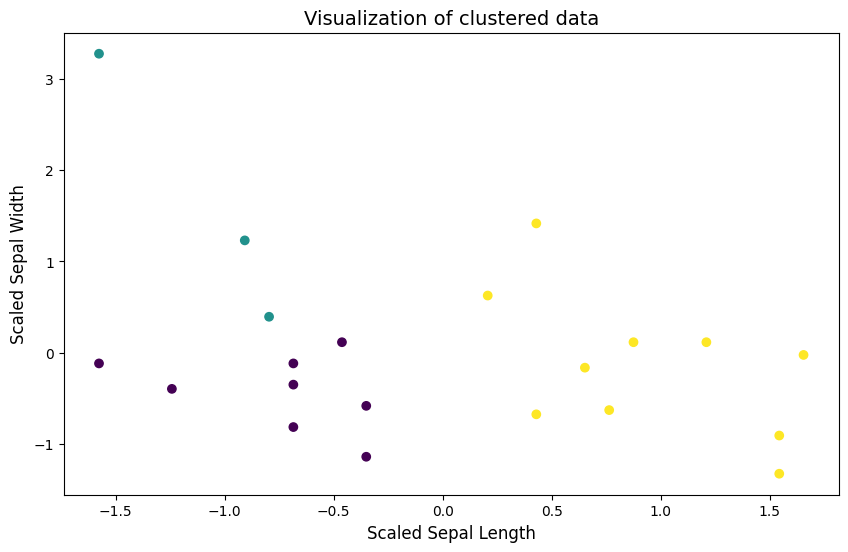

   Age   A Stage T Stage N Stage  Tumor Size Estrogen Status Grade  cluster
0   68  Regional      T1      N1           4        Positive     3        5
1   50  Regional      T2      N2          35        Positive     2        3
2   58  Regional      T3      N3          63        Positive     2        5
3   58  Regional      T1      N1          18        Positive     3        5
4   47  Regional      T2      N1          41        Positive     3        4


In [163]:
import pandas as pd
import numpy as np
from scipy import datasets
from sklearn.calibration import LabelEncoder

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# from mpl_toolkits.mplot3d import Axes3D

bc_file = pd.read_csv('./datasets/Breast_Cancer.csv')
bc = pd.DataFrame(bc_file)
bc.columns = bc.columns.str.strip()
data = bc[['Age', 'A Stage', 'T Stage', 'N Stage', 'Tumor Size', 'Estrogen Status', 'Grade']][:21]
numeric_data = bc[['Age', 'Tumor Size', 'Grade']][:21]  
t_size = bc['Tumor Size'][:21]
grade = bc['Grade'][:21]
age = bc['Age'][:21]


# Preliminary data exploration
label_encoder = LabelEncoder()
grade_numeric = label_encoder.fit_transform(grade)

# print(grade_numeric)
# print(numeric_data)

# # Preprocessing the data (standardize)
scaler = StandardScaler()
scaled_bc = scaler.fit_transform(numeric_data)

# print(scaled_bc[:5])

# ### KMEANS --- ELBOW METHDO ###

inertia = []
for i in range(1, 4):
    kmeans = KMeans(n_clusters=i, n_init=20, random_state=42)
    kmeans.fit(scaled_bc)
    inertia.append(kmeans.inertia_)# Plot the elbow graph


# plt.figure(figsize=(10, 6))
# plt.plot(range(1, 11), inertia, marker='o')
# plt.title('Elbow Method For Optimal k')
# plt.xlabel('Number of clusters')
# plt.ylabel('Within-cluster Sum of Square')
# plt.show()

clusters = kmeans.fit_predict(scaled_bc)
adj_clusters = [(x + 3) %8 for x in clusters]
print(adj_clusters)

# print(confusion_matrix(t_size, adj_clusters))
# print(classification_report(t_size, adj_clusters))

plt.figure(figsize=(10, 6))
plt.scatter(scaled_bc[:,0], scaled_bc[:,1], c=adj_clusters, cmap='viridis', marker='o')
plt.title('Visualization of clustered data', fontsize=14)
plt.xlabel('Scaled Sepal Length', fontsize=12)
plt.ylabel('Scaled Sepal Width', fontsize=12)
plt.show()

selected_columns = ['Tumor Size', 'Estrogen Status', 'Grade']
selected_columns = ['Age', 'A Stage', 'T Stage', 'N Stage', 'Tumor Size', 'Estrogen Status', 'Grade']

iris_df = bc[selected_columns][:21]

# Add the cluster labels as a new column to the DataFrame
iris_df['cluster'] = adj_clusters

# Now let's see the first 5 instances of our new dataset
print(iris_df.head())
# print(bc)



In [ ]:
# ### APRIORI ###

import pandas as pd
import numpy as np
from scipy import datasets
from sklearn.calibration import LabelEncoder

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt